# Week 6 in class

#### Learning goals
- Introducing you to advanced data cleaning methods
- Introducing you to saving DataFrames
- Increasing your comfort with using `groupby`, `pivot_table`, and reshaping.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Cleaning Data

For many data projects, a [significant proportion of
time](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#74d447456f63)
is spent collecting and cleaning the data — not performing the analysis.

This non-analysis work is often called “data cleaning”.

pandas provides very powerful data cleaning tools, which we
will demonstrate using the following dataset.

In [3]:
df = pd.DataFrame({"numbers": ["#23", "#24", "#18", "#14", "#12", "#10", "#35"],
                   "nums": ["23", "24", "18", "14", np.nan, "XYZ", "35"],
                   "colors": ["green", "red", "yellow", "orange", "purple", "blue", "pink"]})
df

,numbers,nums,colors
0,#23,23,green
1,#24,24,red
2,#18,18,yellow
3,#14,14,orange
4,#12,NaN,purple
5,#10,XYZ,blue
6,#35,35,pink


What would happen if we wanted to try and compute the mean of
`numbers`?

In [48]:
#df["numbers"].mean()


It throws an error!

Can you figure out why? Hint: As always, when looking at error messages, start at the very
bottom.

The final error says, `TypeError: Could not convert #23#24... to numeric`.

---------

**Exercise 1**

Convert the string below into a number.

In [2]:
c2n = "#39"
# YOUR CODE HERE
#raise NotImplementedErro
c2n = pd.to_numeric(c2n.replace("#", ""))
c2n.dtype

dtype('int64')

### String Methods

One way to make this change to every element of a column would be to loop through all elements of the column and apply the desired string methods… One significantly faster (and easier) method is to apply a string method to an entire column of data.

Most methods that are available to a Python string are also available to a pandas Series that has `dtype` object. We access them by doing `s.str.method_name` where `method_name` is the name of the method. When we apply the method to a Series `s`, it is applied to all rows in the Series in one shot!

For example, we can check whether the colors contain blue, as below:

In [27]:
df["colors"].str.contains("blue")

0    False
1    False
2    False
3    False
4    False
5     True
6    False
Name: colors, dtype: bool

**Exercise 2**

Make a new column called `numbers_str` that contains the elements of
`numbers` but without `"#"`. Afterwards, show the data types in the DataFrame.

In [36]:
# YOUR CODE HERE
#raise NotImplementedError()
df["numbers_str"] = df["numbers"].str.replace("#", "")
df

,numbers,nums,colors,numbers_str
0,#23,23,green,23
1,#24,24,red,24
2,#18,18,yellow,18
3,#14,14,orange,14
4,#12,NaN,purple,12
5,#10,XYZ,blue,10
6,#35,35,pink,35


### Type Conversions

The `dtype` of the `numbers_str` column shows that pandas still treats it as a string even after we have removed the `"#"`.

We need to convert this column to numbers. The best way to do this is using the `pd.to_numeric` function.

This method attempts to convert whatever is stored in a Series into numeric values. For example, after the `"#"` removed, the numbers of column `"numbers"` are ready to be converted to actual numbers, as below.

In [55]:
df["numbers_numeric"] = pd.to_numeric(df["numbers_str"])
df.dtypes

numbers            object
nums               object
colors             object
numbers_str        object
numbers_numeric     int64
dtype: object

We can convert to other types well. Using the `astype` method, we can convert to any of the supported pandas `dtypes`. For example, we can convert our new variable from integers to floats, as below.

In [56]:
df["numbers_numeric"] = df["numbers_numeric"].astype(float)
df.dtypes

numbers             object
nums                object
colors              object
numbers_str         object
numbers_numeric    float64
dtype: object

**Exercise 3**

Convert the column `"nums"` to a numeric type and save it to the DataFrame as `"nums_tonumeric"`.

*Hint:* Notice that there is a missing value, and a value that is not a number. Look at the documentation for `pd.to_numeric` and think about how to overcome this.

Why could your solution be a bad idea if used without knowing what your data looks like? 

*Hint:* Think about what happens when you apply it to the `"numbers"` column before replacing the `"#"`.

In [23]:
# YOUR CODE HERE
#raise NotImplementedError()
df["nums_tonumeric"] = pd.to_numeric(df["nums"].str.replace("XYZ", "10"))
#df["nums_tonumeric"] = df["nums"]
df


,numbers,nums,colors,nums_tonumeric
0,#23,23,green,23.0
1,#24,24,red,24.0
2,#18,18,yellow,18.0
3,#14,14,orange,14.0
4,#12,NaN,purple,NaN
5,#10,XYZ,blue,10.0
6,#35,35,pink,35.0


YOUR ANSWER HERE

**Exercise 4**

Convert the column `"numbers_numeric"` back into integers.

In [65]:
# YOUR CODE HERE
#raise NotImplementedError()
df["numbers_numeric"].astype(int)

0    23
1    24
2    18
3    14
4    12
5    10
6    35
Name: numbers_numeric, dtype: int32

### Missing data

**Exercise 5**

Looking at the other variables, you notice that the missing item should be 10. Replace the missing item with 10.

In [66]:
# YOUR CODE HERE
#raise NotImplementedError()
df["nums"].str.replace("XYZ", "10")

0     23
1     24
2     18
3     14
4    NaN
5     10
6     35
Name: nums, dtype: object

## Case study

We will now use data from an [article](https://www.nytimes.com/interactive/2015/02/17/upshot/what-do-people-actually-order-at-chipotle.html) written by The Upshot at the NYTimes.

The csv-file `chipotle_raw.csv` has order information from almost 2,000 [Chipotle](https://en.wikipedia.org/wiki/Chipotle_Mexican_Grill) orders and includes information on what was ordered and how much it cost.

In [2]:
chipotle = pd.read_csv("chipotle_raw.csv")
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


**Exercise 6**

We'd like you to use this data and all your data cleaning skills to answer the following questions.

- What is the average price of an item with chicken?  
- What is the average price of an item with steak?  
- Did chicken or steak produce more revenue (total)? 

*Hint:* You may need to use the string methods shown above, and don't forget to use the variable `quantity`.

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()
chipotle["price_numeric"] = pd.to_numeric(chipotle["item_price"].str.replace("$", "", regex = True))
chipotle["revenue"] = chipotle["quantity"]*chipotle["price_numeric"]
chipotle.head()



,order_id,quantity,item_name,choice_description,item_price,price_numeric,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96


In [9]:


chicken = chipotle[(chipotle["choice_description"].str.contains("Chicken")) | chipotle["item_name"].str.contains("Chicken")]
print("Chicken avg. price and revenue")
print(chicken["price_numeric"].mean())
print(chicken["revenue"].sum())

Chicken avg. price and revenue
10.124990415335414
17779.15


In [5]:
cow = chipotle[(chipotle["choice_description"].str.contains("Steak")) | chipotle["item_name"].str.contains("Steak")]
print("Steak avg. price and revenue")
print(cow["price_numeric"].mean())
print(cow["revenue"].sum())


Steak avg. price and revenue
10.501218130311576
8102.22


In [7]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price,price_numeric,revenue,CK,chicken
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39,NaN,False
1,1,1,Izze,[Clementine],$3.39,3.39,3.39,False,False
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39,False,False
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39,NaN,False
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96,False,True


In [6]:
chipotle["CK"] = chipotle["choice_description"].str.contains("Chicken")
chipotle["chicken"] = chipotle["item_name"].str.contains("Chicken")
total = 0
for i in range(len(chipotle)):
    if chipotle["chicken"].loc[i] == True:
        total  = total +  chipotle["revenue"][i]
    if chipotle["CK"].loc[i] == True:
        total  = total +  chipotle["revenue"][i]  #.loc[i] is optional after chipotle["revenue"]

print(f"{round(total, 3)}$ is the total revenue of chicken")
print(total/len(chicken))

17779.15$ is the total revenue of chicken
11.360479233226787


## Writing DataFrames

Let’s now talk about saving a DataFrame to a file.

As a general rule of thumb, if we have a DataFrame `df` and we would like to save to save it as a file of type `FOO`, then we would call the method named `df.to_FOO(...)`.

We will show you how this can be done and try to highlight some issues. But, we will not cover all possible options and features — we feel it is best to learn these as you need them by consulting the appropriate documentation.

Let’s show `df.to_csv` as an example.

Without any additional arguments, the `df.to_csv` function will return a string containing the csv form of the DataFrame:

In [45]:
print(chipotle.head().to_csv())

,order_id,quantity,item_name,choice_description,item_price,price_numeric,revenue,CK,chicken
0,1,1,Chips and Fresh Tomato Salsa,,$2.39 ,2.39,2.39,,False
1,1,1,Izze,[Clementine],$3.39 ,3.39,3.39,False,False
2,1,1,Nantucket Nectar,[Apple],$3.39 ,3.39,3.39,False,False
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39 ,2.39,2.39,,False
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98 ,16.98,33.96,False,True



If we do pass an argument, the first argument will be used as the file name. By default, it ends up in the same folder as your notebook (but you can also specify another path).

In [46]:
chipotle.to_csv("chipotle.csv")

You can see above and in the file that the csv-form contains the index, which will appear as a variable once you read the csv-file again in pandas. You can prevent this with `index = False`, as below.

In [47]:
chipotle.to_csv("chipotle.csv", index = False)

**Exercise 7**

Analogous to above, export the `chipotle` DataFrame as an excel-file `chipotle.xlsx`.

In [51]:
# YOUR CODE HERE
#raise NotImplementedError()
chipotle.head().to_excel("chipotle.xlsx", index = False)

None


## Combining groupby, pivot tables, and reshaping.

Remember the nlsw88 data on a sample of women from this week's homework.

In [61]:
women = pd.read_csv("nlsw88.csv")
women.head()
women.dtypes

idcode             int64
age                int64
race              object
married           object
never_married      int64
grade            float64
collgrad          object
south              int64
smsa              object
c_city             int64
industry          object
occupation        object
union             object
wage             float64
hours            float64
ttl_exp          float64
tenure           float64
dtype: object

### Pivot tables

**Exercise 8**

In the homework we used `groupby` to create a bar plot showing average wages of women of different race, see the code below. Now use `pivot_table` instead of `groupby` to create the same bar plot.

,wage
race,
black,6.844558
other,8.550781
white,8.082999


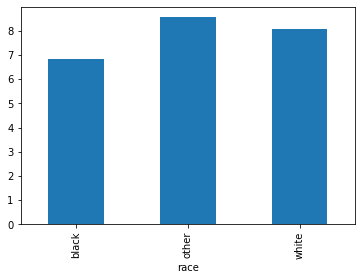

In [74]:
women.groupby("race")["wage"].mean().plot(kind="bar")
# YOUR CODE HERE
#raise NotImplementedError()
women.pivot_table(values = "wage", index = "race").plot(kind = "bar")

**Exercise 9**

Use `T` to create a table with each race in a separate column, and rows with average wages, working hours, and education levels (grades)

In [81]:
# YOUR CODE HERE
#raise NotImplementedError()
yes = women.pivot_table(values = ["wage", "hours", "grade"], index = "race")
yes.T

race,black,other,white
grade,12.457045,13.269231,13.324572
hours,38.120482,36.807692,36.903976
wage,6.844558,8.550781,8.082999


**Exercise 10**

The tabel shows that black women earn lower wages and have a lower education level than white women on average. Can the lower education level  explain why black women earn lower wages? 

Use `pivot_table` to create a two-way table with `race` in the columns, `collgrad` in the rows, and average wages as values.

In [106]:
ex10 = women.pivot_table(values="wage", index="collgrad", columns="race")
ex10

race,black,other,white
collgrad,,,
college grad,11.358608,11.596778,10.298948
not college grad,5.875918,6.938195,7.318251


We see that the evidence is mixed. Black women with a college degree earn more than white women with a college degree, but black women without a college degree earn less than white women without a college degree. 

### Groupby objects

You conclude that it may be useful to condition on both race and education level. One way to do so is to use a groupby object, like below:

In [84]:
gbCollegeRace = women.groupby(["collgrad", "race"])
type(gbCollegeRace)

You can select those observations that satisfy the group characteristics that you are interested using `get_group`. For instance, the code below shows the first five lines of the DataFrame of all black women without a college degree.

In [102]:
gbCollegeRace.get_group(("not college grad","black")).head() # note a tuple!

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
0,1,37,black,single,0,12.0,not college grad,0,SMSA,0,Transport/Comm/Utility,Operatives,union,11.739125,48.0,10.333334,5.333334
1,2,37,black,single,0,12.0,not college grad,0,SMSA,1,Manufacturing,Craftsmen,union,6.400963,40.0,13.621795,5.250000
2,3,42,black,single,1,12.0,not college grad,0,SMSA,1,Manufacturing,Sales,NaN,5.016723,40.0,17.730770,1.250000
39,75,39,black,single,0,11.0,not college grad,0,nonSMSA,0,Manufacturing,Operatives,union,12.500001,40.0,14.499999,9.333333
47,106,38,black,single,0,12.0,not college grad,1,SMSA,1,Public Administration,Sales,nonunion,10.837358,40.0,17.416666,17.416666


One can directly apply methods to a groupby object. For instance, using `gbCollegeRace` one can compute the mean for each variable splitting observations by both college graduation and race.

In [118]:
gbCollegeRace.mean()

idcode        age  never_married      grade  \
collgrad         race                                                      
college grad     black  3010.427184  38.378641       0.174757  16.679612   
                 other  4023.888889  39.777778       0.222222  16.444444   
                 white  2297.002381  39.278571       0.145238  16.735714   
not college grad black  3191.666667  38.904167       0.181250  11.549061   
                 other  3688.470588  39.058824       0.058824  11.588235   
                 white  2434.090386  39.270337       0.053410  12.146382   

                           south    c_city       wage      hours    ttl_exp  \
collgrad         race                                                         
college grad     black  0.631068  0.611650  11.358608  39.728155  13.840055   
                 other  0.000000  0.333333  11.596778  41.111111  13.238604   
                 white  0.364286  0.280952  10.298948  38.556086  13.351221   
not college grad black  0.641667  0.464583   5.875918  37.774059  12.478045   
                 other  0.176471  0.235294   6.938195  34.529412  12.259804   
                 white  0.339359  0.200493   7.318251  36.334704  12.163922   

                          tenure  
collgrad         race             
college grad     black  8.066993  
                 other  4.500000  
                 white  6.582538  
not college grad black  6.166141  
                 other  5.186274  
                 white  5.539666

Note that `collgrad` and `race` appear as (hierarchical) indices.

**Exercise 11**

Use one of the reshaping methods studied last week (`set_index`, `reset_index`, `stack`, or `unstack`) and the groupby object `gbCollegeRace` to create the same two-way table as you made for the previous Exercise.

In [112]:
# YOUR CODE HERE
#raise NotImplementedError()
gbCollegeRace.mean().unstack()["wage"]

race,black,other,white
collgrad,,,
college grad,11.358608,11.596778,10.298948
not college grad,5.875918,6.938195,7.318251


In [107]:
ex10

race,black,other,white
collgrad,,,
college grad,11.358608,11.596778,10.298948
not college grad,5.875918,6.938195,7.318251


# Python Homework Week 6

#### Learning goals
- Refreshing your knowledge on data visualisation and missing data
- Increasing your comfort with aggregations and datetime objects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data visualization and missing data

We will study a real world dataset on a group of women in their 30s and early 40s to study labor force patterns.

**a) [1 point]**

The csv-file `nlsw88.csv` contains wages and and other job and background characteristics of a sample of women in the United States in 1988. The data come from the National Longitudinal Survey of Young Woman. Variable definitions are available at this [link](https://www.rdocumentation.org/packages/Counterfactual/versions/1.2/topics/nlsw88).

Create a DataFrame `women` using `nlsw88.csv`, and investigate what variables are present in this DataFrame. 

*Hint:* Make sure that the csv-file is in the same folder as this notebook, or specify a path. 

In [2]:
# YOUR CODE HERE
#raise NotImplementedError()
women = pd.read_csv("nlsw88.csv")
women

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
0,1,37,black,single,0,12.0,not college grad,0,SMSA,0,Transport/Comm/Utility,Operatives,union,11.739125,48.0,10.333334,5.333334
1,2,37,black,single,0,12.0,not college grad,0,SMSA,1,Manufacturing,Craftsmen,union,6.400963,40.0,13.621795,5.250000
2,3,42,black,single,1,12.0,not college grad,0,SMSA,1,Manufacturing,Sales,NaN,5.016723,40.0,17.730770,1.250000
3,4,43,white,married,0,17.0,college grad,0,SMSA,0,Professional Services,Other,union,9.033812,42.0,13.211537,1.750000
4,6,42,white,married,0,12.0,not college grad,0,SMSA,0,Manufacturing,Operatives,nonunion,8.083731,48.0,17.820513,17.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,5153,35,white,single,1,12.0,not college grad,1,SMSA,0,Professional Services,Laborers,NaN,5.517124,35.0,11.987180,2.083333
2242,5154,44,white,married,0,16.0,college grad,1,SMSA,0,Professional Services,Professional/technical,nonunion,14.323667,40.0,12.705128,12.166667
2243,5156,42,white,married,0,12.0,not college grad,1,nonSMSA,0,Business/Repair Svc,Sales,nonunion,3.824476,40.0,18.858974,9.583333
2244,5157,38,black,married,0,12.0,not college grad,1,nonSMSA,0,Professional Services,Laborers,nonunion,2.447664,35.0,11.160256,10.750000


**b) [1 point]**

Use a method to quickly investigate what values the variable `south` can take. What do you think this variable tells you?

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()
women["south"].describe()

count    2246.000000
mean        0.419412
std         0.493573
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: south, dtype: float64

Is 0 if the woman is from the south or 1 if she is.

**c) [1 point]**

Create a new variable `log_wage` that is the natural logarithm of `wage`. 

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
women["log_wage"] = np.log(women["wage"])


**d) [1 point]**

Create a plot that shows the relationship between `wage` and `ttl_exp`. Use a size for each observation of 2 and a translucence of 0.5. 

What can one learn from this plot?

<AxesSubplot:xlabel='ttl_exp', ylabel='wage'>

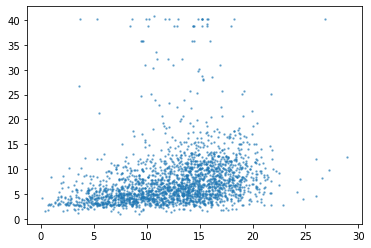

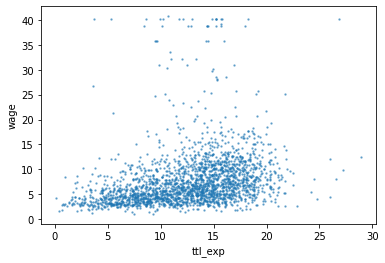

In [9]:
# YOUR CODE HERE

plt.scatter(women["ttl_exp"], women["wage"], alpha = 0.5, s = 2)

#tutorial way
women.plot("ttl_exp", "wage", kind = "scatter", s = 2, alpha = 0.5)

YOUR ANSWER HERE

**e) [1 point]**

Women of different race earn on average different wages. Use `groupby` to create a plot that shows average wage by race.

<AxesSubplot:xlabel='race'>

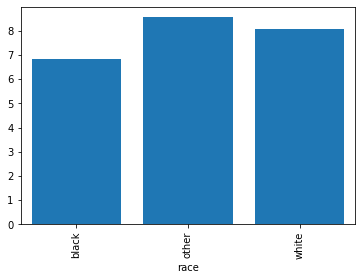

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()
racer = women.groupby(["race"]).mean()

plt.bar(racer.index.values, racer['wage'])

#tutorial way
women.groupby("race")["wage"].mean().plot(kind = "bar")

One way to depict income inequality is [Pen's Parade](https://en.wikipedia.org/wiki/Pen%27s_parade), named after the Dutch economist Jan Pen. The parade lasts one hour and consists of a succession of 60 marchers (one each minute) representing 1 out of 60 [quantiles](https://en.wikipedia.org/wiki/Quantile) of the income distribution (a quantile is the general word for a percentile, decile, quartile, etc.). The height of every marcher is proportional to the income of their quantile, and marchers are ordered from lowest to greatest.

**f) [1 point]**

Create a bar plot of Pen's Parade to depict wage inequality among American women in 1988.
1. Create 60 equally-spaced bins between 0 and 1.
2. Use the `quantile` function to find the wage corresponding to each of the 60 bins.
3. Plot the wages corresponding to each bin, numbering the bars from 1 to 60.

Why do you think Jan Pen called his parade a parade of many dwarves and a few giants?

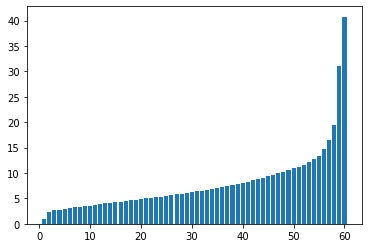

In [12]:
# YOUR CODE HERE
#raise NotImplementedError()
minutes = np.linspace(0,1,60)
quantiles = women["wage"].quantile(minutes)
plt.bar(np.arange(1,61), quantiles)
plt.show()
###

YOUR ANSWER HERE

**g) [1 point]**

Many datasets have missing data, including this one. Show which variables contain missing data.

In [16]:
# YOUR CODE HERE
#raise NotImplementedError()
women.isna().any()
###

idcode           False
age              False
race             False
married          False
never_married    False
grade             True
collgrad         False
south            False
smsa             False
c_city           False
industry          True
occupation        True
union             True
wage             False
hours             True
ttl_exp          False
tenure            True
log_wage         False
dtype: bool

**h) [1 point]**

How many observations in this dataset contain missing data?

In [28]:
# YOUR CODE HERE
#raise NotImplementedError()
women.isna().sum().sum()
#but in this case some obs. contain more than one missing item we avoid double counting by:
women.isna().any(axis=1).sum()

398

## Aggregations and `datetime`

Below we will use unemployment data by US state at a monthly frequency, as contained in the file `state_unemployment.csv`. The pandas `read_csv` function will determine most datatypes of the underlying columns. The exception here is that we need to give pandas a hint so it can load up the `Date` column as a Python datetime type, as below.

In [29]:
unemp_raw = pd.read_csv("state_unemployment.csv", parse_dates=["Date"])
print(unemp_raw.dtypes)
unemp_raw.head()

Date                datetime64[ns]
state                       object
LaborForce                 float64
UnemploymentRate           float64
dtype: object


,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0


**i) [1 point]**

One of the reasons people are concerned about business cycles is that unemployment can increase a lot during recessions. 

One way to look at unemployment changes is to study the variance of unemployment over time. Which states are relatively volatile? Compute the variance of unemployment for each state.

In [30]:
# YOUR CODE HERE
#raise NotImplementedError()
county = unemp_raw.groupby(["state"])["UnemploymentRate"].var()
county
###

state
Alabama            4.548286
Alaska             0.257506
Arizona            4.179021
Arkansas           1.957209
California         6.039162
Colorado           3.449818
Connecticut        3.674742
Delaware           2.779145
Florida            5.780556
Georgia            5.011162
Hawaii             2.265971
Idaho              3.397612
Illinois           3.846785
Indiana            4.685977
Iowa               0.942789
Kansas             1.076341
Kentucky           3.402510
Louisiana          1.469891
Maine              2.558667
Maryland           1.930448
Massachusetts      2.291571
Michigan           6.817340
Minnesota          1.676511
Mississippi        2.724155
Missouri           2.913183
Montana            1.253705
Nebraska           0.340393
Nevada            10.002977
New Hampshire      1.170149
New Mexico         1.538129
New York           2.293530
New jersey         3.987372
North Carolina     4.847969
North Dakota       0.174066
Ohio               3.296091
Oklahoma      

**j) [1 point]**

Instead of using a built-in aggregation like `var`, it is also possible to write your own aggregation, which you can call with `agg`, as you have seen in Datacamp.

Create a function `high_or_low` that takes a pandas Series as argument. The function should return `"High"` if the variance of the series is equal to or above 2.5, and should return `"Low"` if the variance of the series is below 2.5.

Apply your function to find out which states have volatile unemployment, and which don't.

In [33]:
# YOUR CODE HERE
#raise NotImplementedError()
def high_or_low(s):
    if s.var() < 2.5:
        out = "low"
    else:
        out = "high"
    return out
unemp_raw.groupby(["state"])["UnemploymentRate"].agg(high_or_low)

state
Alabama           high
Alaska             low
Arizona           high
Arkansas           low
California        high
Colorado          high
Connecticut       high
Delaware          high
Florida           high
Georgia           high
Hawaii             low
Idaho             high
Illinois          high
Indiana           high
Iowa               low
Kansas             low
Kentucky          high
Louisiana          low
Maine             high
Maryland           low
Massachusetts      low
Michigan          high
Minnesota          low
Mississippi       high
Missouri          high
Montana            low
Nebraska           low
Nevada            high
New Hampshire      low
New Mexico         low
New York           low
New jersey        high
North Carolina    high
North Dakota       low
Ohio              high
Oklahoma           low
Oregon            high
Pennsylvania       low
Rhode island      high
South Carolina    high
South Dakota       low
Tennessee         high
Texas              low
Utah 

**k) [1 point]**

Use `pivot_table` to create a DataFrame `unemp_all` containing the unemployment rates, with the US states as columns and `Date` as index.

In [42]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp_all = unemp_raw.pivot_table(values ="UnemploymentRate", index=  "Date", columns = "state")
unemp_all

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,4.0,7.2,4.7,3.7,4.6,2.9,4.5,4.6,4.0,4.5,...,3.4,3.4,4.0,3.2,3.0,3.7,4.8,5.2,3.3,4.1
2017-09-01,3.9,7.2,4.7,3.7,4.5,3.0,4.5,4.5,3.9,4.5,...,3.4,3.3,4.0,3.2,2.9,3.6,4.7,5.3,3.3,4.1
2017-10-01,3.8,7.2,4.7,3.7,4.5,3.0,4.5,4.5,3.9,4.5,...,3.4,3.3,3.9,3.2,2.9,3.6,4.7,5.4,3.2,4.2


**l) [1 point]**

One of the advantages of a `DatetimeIndex` is that it is easy to slice.

Consider the list of states below. Create a DataFrame `unemp` that contains unemployment rates for only those states between January 2006 and December 2015 (including).

In [43]:
states = ["Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"]
# YOUR CODE HERE
#raise NotImplementedError()
unemp = unemp_all.loc['2006-01-01':'2016-01-01', states]
unemp
###

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2006-01-01,4.5,5.0,3.2,5.1,6.8,4.8,5.2
2006-02-01,4.4,5.0,3.2,4.9,6.9,4.8,5.1
2006-03-01,4.4,4.9,3.1,4.8,6.9,4.7,5.1
2006-04-01,4.4,4.9,3.2,4.6,7.0,4.7,5.1
2006-05-01,4.3,4.9,3.2,4.6,7.0,4.7,5.1
...,...,...,...,...,...,...,...
2015-09-01,5.9,5.9,5.3,5.9,5.1,5.0,4.4
2015-10-01,5.8,5.8,5.2,5.9,5.0,4.9,4.4
2015-11-01,5.8,5.7,5.1,6.0,4.9,4.9,4.5


### Transforms

Many analytical operations do not necessarily involve an aggregation. The output of a function applied to a Series might be a new Series.

For example,
- Calculate the cumulative sum of elements in each column (`cumsum`), as you have seen in Datacamp.
- Compute the difference in unemployment from month to month (`diff`).
- Compute the percentage change in unemployment from month to month (`pct_change`).

**m) [1 point]**

Which state had the largest percentage increase in unemployment from one month to another?

*Hint:* Once you found the largest percentage increase for each state, you can select the state with the largest increase using the method `idxmax`.

In [45]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp.pct_change().max().idxmax()

'Texas'

**n) [1 point]**

The DataFrame `unemp` contains dates starting at the height of the boom before the Great Recession, and ends 10 years later.

Which state had the smallest absolute increase (or largest absolute decrease) in the unemployment rate over this period as a whole?

In [46]:
# YOUR CODE HERE
#raise NotImplementedError()
unemp.diff().sum().idxmin()

'Michigan'